<a href="https://colab.research.google.com/github/PauloCesarEngProd/Data_Science/blob/main/Projeto_01_DSNP_3_0_Analisando_os_Dados_do_Airbnb_para_a_cidade_de_Bruxelas_(B%C3%A9lgica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Cidade de Bruxelas, Bélgica*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Bruxelas na Bélgica, e analisar quais insights podem ser extraídos a partir destes dados brutos quanto à locação de hospedagem.**


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Brussels  (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/belgium/bru/brussels/2021-07-13/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que inviabilizará nosso código.

Pensando nisso, disponibilizamos [aqui](https://github.com/PauloCesarEngProd/Data_Science/blob/main/listings.csv) o conjunto que utilizamos, para que possa sempre ser possível utilizar esse material.

##### `Dados coletados em 19/ago/2021. Arquivo compilado em 13/07/21`.


# *Cidade de Bruxelas, Bélgica*

<center><img alt="Cidade de Bruxelas" width="100%" src="https://viagemeturismo.abril.com.br/wp-content/uploads/2016/12/bruxelas1.jpeg?quality=70&strip=info&w=925"></center>

A cidade de Bruxelas é a capital da Bélgica, maior e mais populosa cidade do país com cerca de 1,8 milhão de habitantes.

Ela fica na Região de Bruxelas, um dos comunas (estados) belgas. Localizada bem no meio da Bélgica, Bruxelas é o ponto central do país.

A geografia da cidade é basicamente plana, não tendo registros de montanhas ou outros tipos de planícies na cidade.

O clima, assim como da maior parte da Bélgica, é temperado oceânico, uma vez que sofre bastante influência dos ventos que vem do Oceano Atlântico, mas também dos ventos continentais da Europa.

As temperaturas são baixas no inverno (a média é de 3ºC) e costuma nevar e temperada no verão (média é de 17ºC), sendo que não costuma passar dos 30ºC em dias mais quentes.

A primavera, principalmente entre março e maio, e o inverno, sobretudo entre outubro e dezembro, as temperaturas estão amenas e a cidade cheia de viajantes.

Falando em viajantes, brasileiros não precisa de visto de turismo para viagens de até 90 dias pela Bélgica, somente estar com o passaporte dentro da validades.

Parte integrante da União Europeia, a Bélgica usa o Euro como moeda oficial. O fuso horário é de 4 horas a mais que o horário oficial de Brasília, sendo que a diferença cai para 3 horas no horário de verão brasileiro. O código telefônico é 32.
#### `https://www.queroviajarmais.com/bruxelas/`



## Realizando as ações iniciais


Importando as bibliotecas que serão utilizadas no trabalho e realizando a carga do pacote de dados que será analisado.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame (df)
arquivo = 'http://data.insideairbnb.com/belgium/bru/brussels/2021-07-13/visualisations/listings.csv'
df = pd.read_csv(arquivo)

## Análise dos Dados

Objetivo aqui é possibilitar um entendimento inicial de como estes dados estão estruturados.


**Dicionário das variáveis**

* `id` - identificador único do imóvel
* `name` - nome da propriedade do imóvel
* `host_id` - identificador único do proprietário (anfitrião) do imóvel
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro (aqui refere-se às comunas belgas)
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, é boa prática realizar uma vasculhada nos dados para conhecê-los um pouco. Faremos isto analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85702,4.30771,Entire home/apt,90,2,16,2017-06-30,0.19,2,264
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85709,4.30757,Entire home/apt,74,2,2,2018-10-28,0.03,2,363
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.85182,4.36809,Hotel room,91,1,3,2010-11-06,0.11,2,338
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200,2,0,NaN,NaN,1,365
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,74,5,105,2020-02-28,1.00,1,285


### **Q1. Quantos atributos (variáveis/colunas) e quantas entradas (registros/linhas) o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Neste ponto, o objetivo é e identificar a quantidade de entradas que nosso conjunto de dados possui (linhas x colunas) e conhecer os tipos de dados para cada coluna.

Este *dataset* em uso contém a versão "resumida" para estes dados no Airbnb. Na mesma página existe uma versão mais completano arquivo `listings.csv.gz` (Detailed Listings data for Brussels).

In [ ]:
# identificar o volume de dados do DataFrame
print("Número de registros (entradas/linhas): \t {}".format(df.shape[0]))
print("Número de variáveis (colunas): \t {} \n".format(df.shape[1]))

# verificar os tipos de dados destes datasets
print("Lista dos tipos de dados do conjunto em análise:")
display(df.dtypes)

Número de registros (entradas/linhas): 	 5718
Número de variáveis (colunas): 	 16 

Lista dos tipos de dados do conjunto em análise:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a variável `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 20% das linhas.
* As demais variáveis não posuem valores nulos ou possuem um percentual irrissório para valores nulos, coluna `host_name` com 0,03%.

In [ ]:
# ordenar em ordem decrescente as variáveis pelo percentual de seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False)

neighbourhood_group               100.000000
reviews_per_month                  19.762155
last_review                        19.762155
host_name                           0.034977
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para esta análise, serão plotados os histogramas para as variáveis quantitativas.

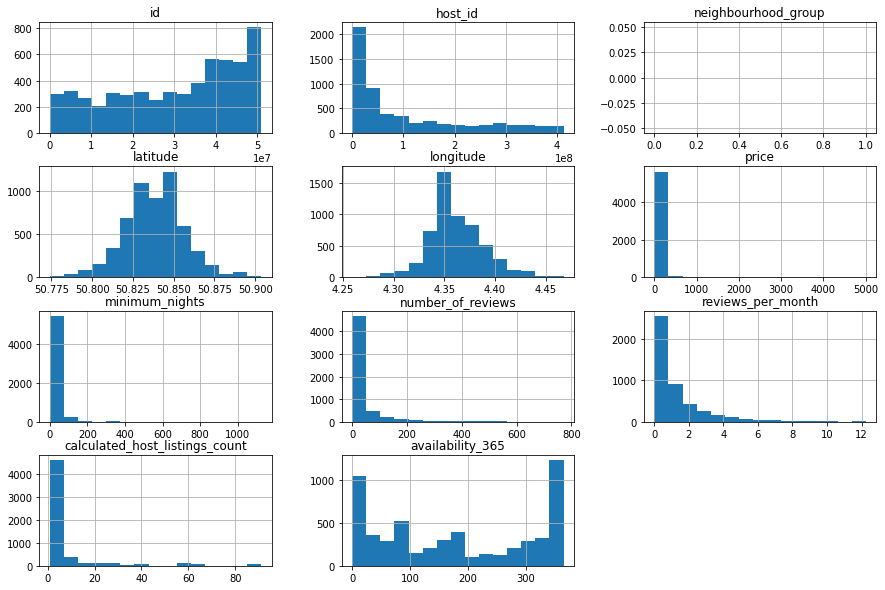

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

A observação dos histogramas nos possibilita verificar indícios da presença de *outliers*. Sob interesse deste trabalho, serão objeto de trabalho as variáveis `price` e `minimum_nights`.

Percebe-se que estes valores não seguem uma distribuição dentro de uma "variação regular esperada" e distorcem a representação gráfica correspondente. 
Para corroborar com esta observação, serão utilizadas duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável. (visualização gráfica de outliers)


In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,5718.000000,5718.000000
mean,83.652151,10.054215
std,144.053468,37.243069
min,0.000000,1.000000
25%,43.000000,1.000000
50%,60.000000,2.000000
75%,89.000000,4.000000
max,5000.000000,1125.000000


Olhando o resumo estatístico acima, pode-se confirmar algumas hipóteses de outliers, como:

* A variável `price` possui 75% dos valores até 89, porém seu valor máximo é 5000.
* A  varíavel `minimum_nights` está com limite superior acima de 365 dias no ano.

#### Boxplot para minimum_nights


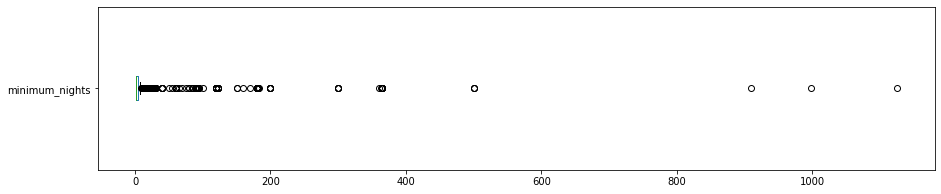

minimum_nights: valores acima de 5 diárias:
Nr. registros encontrados (absoluto): 1111
Nr. registros encontrados (percentual): 19.43%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 5 dias para minimum_nights
print("minimum_nights: valores acima de 5 diárias:")
print("Nr. registros encontrados (absoluto): {}".format(len(df[df.minimum_nights > 5])))
print("Nr. registros encontrados (percentual): {:.2f}%".format(len(df[df.minimum_nights > 5])/df.shape[0]*100))                                                                                  


#### Boxplot para price

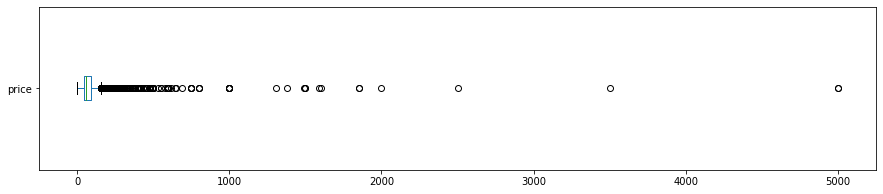

price: valores acima de 95:
Nr. registros encontrados (absoluto): 1179
Nr. registros encontrados (absoluto): 20.62%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 95 para price
print("price: valores acima de 95:")
print("Nr. registros encontrados (absoluto): {}".format(len(df[df.price > 95])))
print("Nr. registros encontrados (absoluto): {:.2f}%".format(len(df[df.price > 95]) / df.shape[0] * 100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Após análises acima (tabela de resumos estatisticos e boxplot), foi estabelecido como parâmetros de corte para este estudo o percentual de 80% para massa de dados significativo, sendo os seguintes valores:

* Para a variável `price` os valores cujo percentual de `outliers` represente em torno de 20%.
* Para a varíavel `minimum_nights` os valores de até 5 dias de reserva, que representam em torno de 80%.


Com base nestes parâmetros, procede-se abaixo a eliminação destes outliers.

#### Histogramas sem *outliers*

Identificados *outliers* nas variáveis `price` e `minimum_nights`, procede-se abaixo a limpeza do *DataFrame*, com nova plotagem dos histogramas para nova observação.

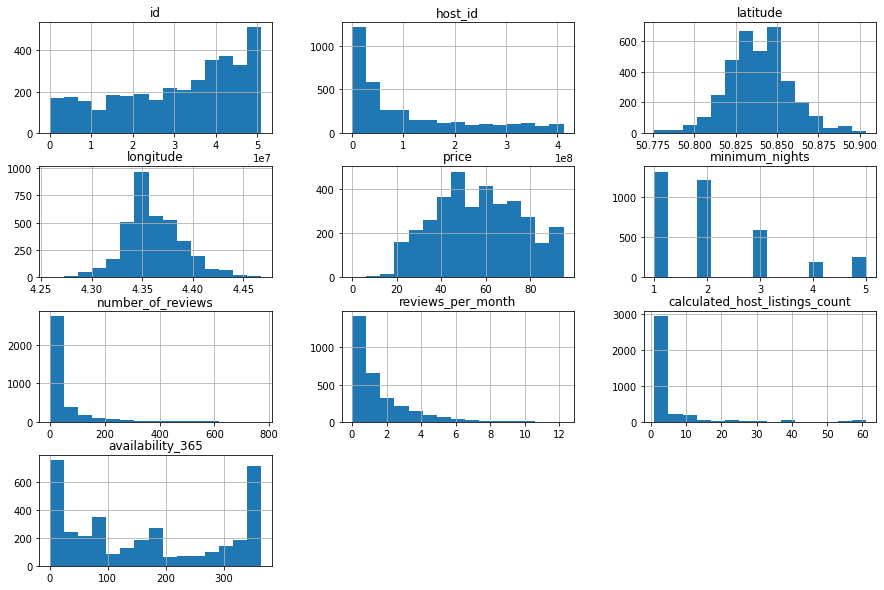

In [ ]:
# remover os *outliers* em um novo DataFrame
df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo.price > 95].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 5].index, axis=0, inplace=True)

# remover `neighbourhood_group`, por estar vazio
df_limpo.drop('neighbourhood_group', axis = 1, inplace = True)

# plotar o histograma para as variáveis numéricas
df_limpo.hist(bins=15, figsize=(15,10));

#### BarPlots sem *outliers*

Após limpeza dos *outliers* nas variáveis `price` e `minimum_nights`, procede-se abaixo a plotagem de novos Barplots para continuidade de novas observações.

#### Boxplot para minimum_nights

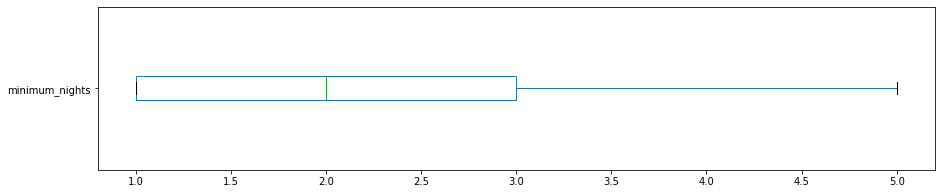

In [ ]:
# plotagem do gráfico para a variável minimum_nights
df_limpo.minimum_nights.plot(kind="box", vert=False, figsize=(15,3))
plt.show()


#### Boxplot para price

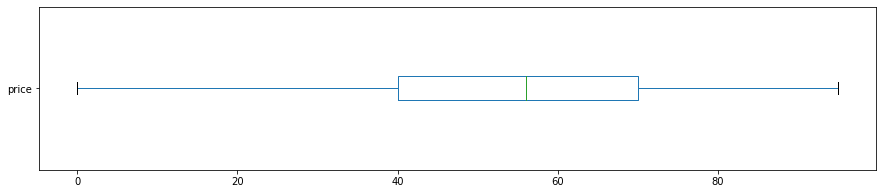

In [ ]:
# plotagem do gráfico para a variável price
df_limpo.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. Em nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse serão criados:

* uma matriz de correlação
* um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

##### **Lembrando que** 
`uma matriz de correlação é uma tabela utilizada para fornecer um entendimento prévio da coesão de relacionamento entre as variáveis, porém não significa de nenhma forma causalidade entre estas variáveis`.

In [ ]:
# criar uma matriz de correlação
correlacao = df_limpo[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.043041,0.015878,0.003774,0.058153,0.074991
minimum_nights,0.043041,1.000000,-0.120723,-0.225495,0.065638,-0.093420
number_of_reviews,0.015878,-0.120723,1.000000,0.723430,0.025910,0.061875
reviews_per_month,0.003774,-0.225495,0.723430,1.000000,0.057689,0.021198
calculated_host_listings_count,0.058153,0.065638,0.025910,0.057689,1.000000,0.041445
availability_365,0.074991,-0.093420,0.061875,0.021198,0.041445,1.000000


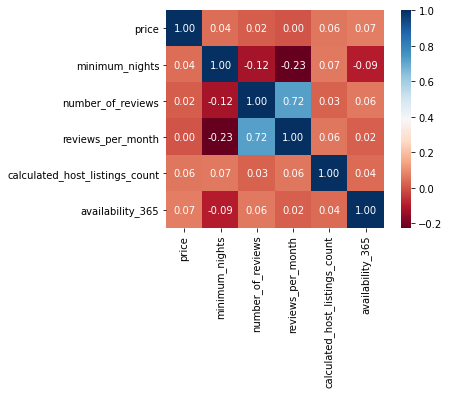

In [ ]:
# plotar um heatmap (mapa de calor) a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade individual de ocorrências de cada tipo de aluguel.

Para as análises abaixo, já está sendo considerado os dados limpos, após os cortes estabelecidos.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
print("Lista dos tipos de imóveis disponíveis em valores absolutos:")
df_limpo.room_type.value_counts()

Lista dos tipos de imóveis disponíveis em valores absolutos:


Entire home/apt    2235
Private room       1256
Shared room          47
Hotel room           22
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print("Lista dos tipos de imóveis disponíveis em percentual:")
df_limpo.room_type.value_counts() / df_limpo.shape[0] * 100

Lista dos tipos de imóveis disponíveis em percentual:


Entire home/apt    62.780899
Private room       35.280899
Shared room         1.320225
Hotel room          0.617978
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Intenção aqui é relacionar as 10 localicações (*neighbourhoods*) com maiores valores (*price*) de locação em ordem decrescente, sendo então a primeira a mais cara.

In [ ]:
# ver preços por bairros, na média
df_limpo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False) [:10]

neighbourhood
Bruxelles              61.605906
Woluwe-Saint-Pierre    58.192308
Ganshoren              57.944444
Ixelles                57.492857
Evere                  55.600000
Anderlecht             55.514793
Forest                 55.112360
Saint-Gilles           55.032746
Auderghem              55.018519
Uccle                  54.112745
Name: price, dtype: float64

Sendo conhecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada imóvel de acordo estas referências geográficas. Para isso, considera-se `x=longitude` e `y=latitude`.

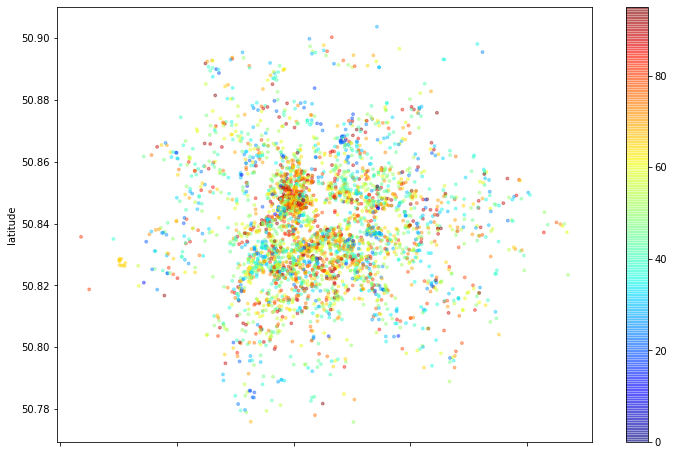

In [ ]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`(em valores inteiros)
print("Número médio do mínimo de noites de locação: {:.0f}".format(df_limpo.minimum_nights.mean()))
print("E um valor (preço) médio de: {:.2f} para estas locações de 2 noites.".format(df_limpo[df_limpo.minimum_nights == 2].price.mean()))

Número médio do mínimo de noites de locação: 2
E um valor (preço) médio de: 57.95 para estas locações de 2 noites.


In [ ]:
#identificar as 10 maiores localizações onde ocorrem as maiores locações na média de 2 noitese com preços próximos a 58
df_limpo2 = df_limpo[df_limpo.minimum_nights == 2]
df_limpo2 = df_limpo2[df_limpo2.price >= 55]
df_limpo2 = df_limpo2[df_limpo2.price <= 60]
df_limpo2.groupby(['neighbourhood']).price.count().sort_values(ascending=False) [:10]


neighbourhood
Bruxelles               65
Ixelles                 26
Schaerbeek              21
Forest                  15
Saint-Gilles            13
Molenbeek-Saint-Jean     8
Etterbeek                8
Auderghem                7
Anderlecht               6
Uccle                    6
Name: price, dtype: int64

Plotagem de cada imóvel das 10 maiores localizações onde ocorrem as maiores locações na média de **2 noites** e com preços próximos a **58** de acordo  as referências geográficas de `x=longitude` e `y=latitude`.

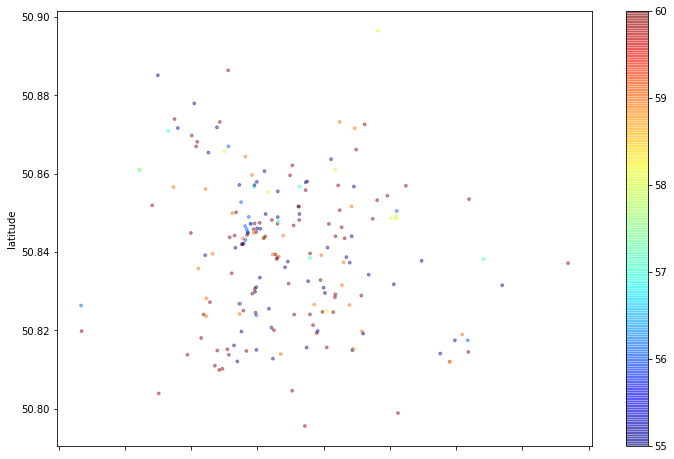

In [ ]:
# plotar os imóveis pela latitude-longitude
df_limpo2.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo2['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [ ]:
#plotagem do mapa 
latitude =  df_limpo2.latitude.values #df_map.latitude.values
longitude = df_limpo2.longitude.values
listings =  df_limpo2.name.values   #df_map.name.values

In [ ]:
# criando o mapa
Brussel = folium.Map(location=[50.8550625,4.3053499],
                 zoom_start=10)
#Brussel

In [ ]:
# adicionando os marcadores
for lat, lon, listing in zip(latitude, longitude, listings):
    folium.Marker(location=[float(lat), float(lon)], popup=listing).add_to(Brussel)
# plotando o mapa
#Brussel.save('Brussel_map.html')
Brussel

## Conclusões

Com base em dados brutos do portal da **Airbnb**, efetuou-se uma análise exploratória referente aos dados de locação de imóveis dos últimos 12 meses quanto a preço e disponibilidade sob uma perspectiva que demonstrasse apenas aqueles mais locados considerando as variáveis `preço`  e `número minimo de noites`.

O intuíto principal foi realizar uma análise de densidade destas locações, sendo que para a variável `preço`, considerar apenas aqueles imóveis cujos valores de locação concentrassem **80%** das reservas e com um `mínimo de noites` reservadas também com este mesmo percentual.

De posse destas premissas, buscou-se encontrar os valores e períodos de estadia que atendessem a estes critérios, sendo encontrados para `preço`um valor de `95` e para `número de diárias` o valor de `5`.

**Ao final** foi possível demonstrar que têm-se o período de *2 noites* e o préço de *58* como parâmetros médios de locação na cidade de Bruxelas, Bélgica, de acordo os dados trabalhaos.

A partir destes dados houve condições de mapear os imóveis quanto a tipos e quantidades disponíveis e sua área de concentração entre as comunas belgas, onde inclusive pode-se identificar comunas cujos imóveis estão na faixa média de diárias e preços médios.

**Importante** deixar aqui registrado que este trabalho não esgota as possibilidades de análises e geração de *insights* possíveis mesmo nesta restrita massa de dados utilizada. 

Uma análise exploratória muito mais rica pode, inclusive, ser obtida com o conjunto de dados completos, com 106 atributos, disponível no mesmo portal da AirBnb.